# *VI Superpixels & Segmentation*

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import emoji
from helpers import show_image

Nous avons avec le *Thresholding* (seuillage) comment Ségmenter une image avec un seuil d'intensité des pixels, pour la rendre Binaire, noir et blanc. Cela nous permet par exemple de séparer le premier plan, du deuxième plan.

Pour explorer et Ségmenter au mieux une image il faut la séparer en groupes de pixels, formant des régions, ce sont les *Superpixels*.  
Ces ensembles forment des représentations et des segments plus logique et qui ont plus sens qu'un simple pixel.  
***Un *Superpixel* est un groupe de pixel connecté ayant des couleurs ou des niveaux de gris simimlaires.***

La *Segmentation par Superpixels* est utiles pour pre-processer des images avant une *Classification* :
- Isoler des régions de plus grandes importances avant l'entrainement
- Donc passer à des images plus petites et gagner en temps et en puissance calculs

Il y à 2 types de *Segmentation*:
- *Supervisé*, l'algorithme est guider par exmple, par seuillage(thresholding) qu'on va lui donner pour l'image binaire.
- *Non-supervisé*, va trouver et divser seul l'image en régions de superpixels

In [2]:
img = plt.imread('data/pmz.jpg')

In [59]:
img.shape

(900, 900, 3)

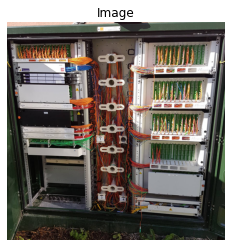

In [21]:
show_image(img)

## Segmentation Non-Supervisé
Utilisons ici *SLIC, Simple Linear Iterative Clustering*, qui va utiliser l'algorithme ***K-means clustering*** pour séparer l'image en superpixel en fonction de leur niveaux de gris.

In [22]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

- Utilisons la fonction *`slic`* pour segmenter l'image en superpixels,  
elle prend en parmètres, l'image et:
    - *`n_segments=`* le nombre de Régions(Segments, Superpixels, Labels) que l'on veut (default=100)
    
*`slic`* renvoie les Régions Segmentés également appelés *Label*  

In [23]:
# Obtain the segmentation with 400 regions
segments = slic(img, n_segments= 400)

- On va utiliser *`label2rgb`* pour colorer les differents labels ou segment retourner par *`slic()`*  
en paramètres:
    - les Segments(label) retournés par *`slic`*
    - l'image d'origine
    - *`kind='avg'`* met en évidence le superpixel avec ici 'avg' pour le colorer de sa couleur moyenne. 

In [24]:
# Put segments on top of original image to compare
segmented_image = label2rgb(segments, img, kind='avg')

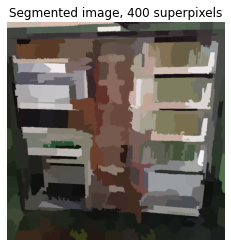

In [25]:
# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

In [53]:
img_pmz1 = plt.imread('data/panneau_droit.png')

In [56]:
# Obtain the segmentation with 400 regions
segments_pmz1 = slic(img_pmz1, n_segments=200)

In [57]:
# Put segments on top of original image to compare
segmented_image = label2rgb(segments_pmz1, img_pmz1, kind='avg')

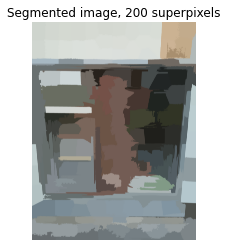

In [58]:
show_image(segmented_image, "Segmented image, 200 superpixels")

## Références
- http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/10_matplotlib's_imshow.html